In [3]:
import numpy as np
import matplotlib.pyplot as plt
import rod
import positionVerlet2nd as verlet
from povray_scripts import dump_snake

# Initialize rod

In [4]:
nelem = 2
L = 1.
r0 = 0.25
x = np.linspace(0.,0.8,nelem+1)
ri = np.array([[i,3./40.*i, r0] if i <= 0.4 else [i,3./40.*(0.8-i), r0] for i in x])
f = np.array([[0.,0.,0.] for i in range(nelem+1)])
rad = np.ones(nelem) * r0

theRod = rod.rod(n=nelem, r=ri, rho=1.0, yng_mod=1.0e1, shr_mod=1.0e1, radii=rad, f_ext=f, gamma=0.0)

## Set boundary conditions

In [5]:
def dirichletBC(my_rod, my_time):
    my_rod.v[1] = 0.0 * my_rod.v[1]

## Initialize time stepper

In [6]:
rodRun = verlet.positionVerlet2nd(theRod, dirichletBC)

<IPython.core.display.Javascript object>


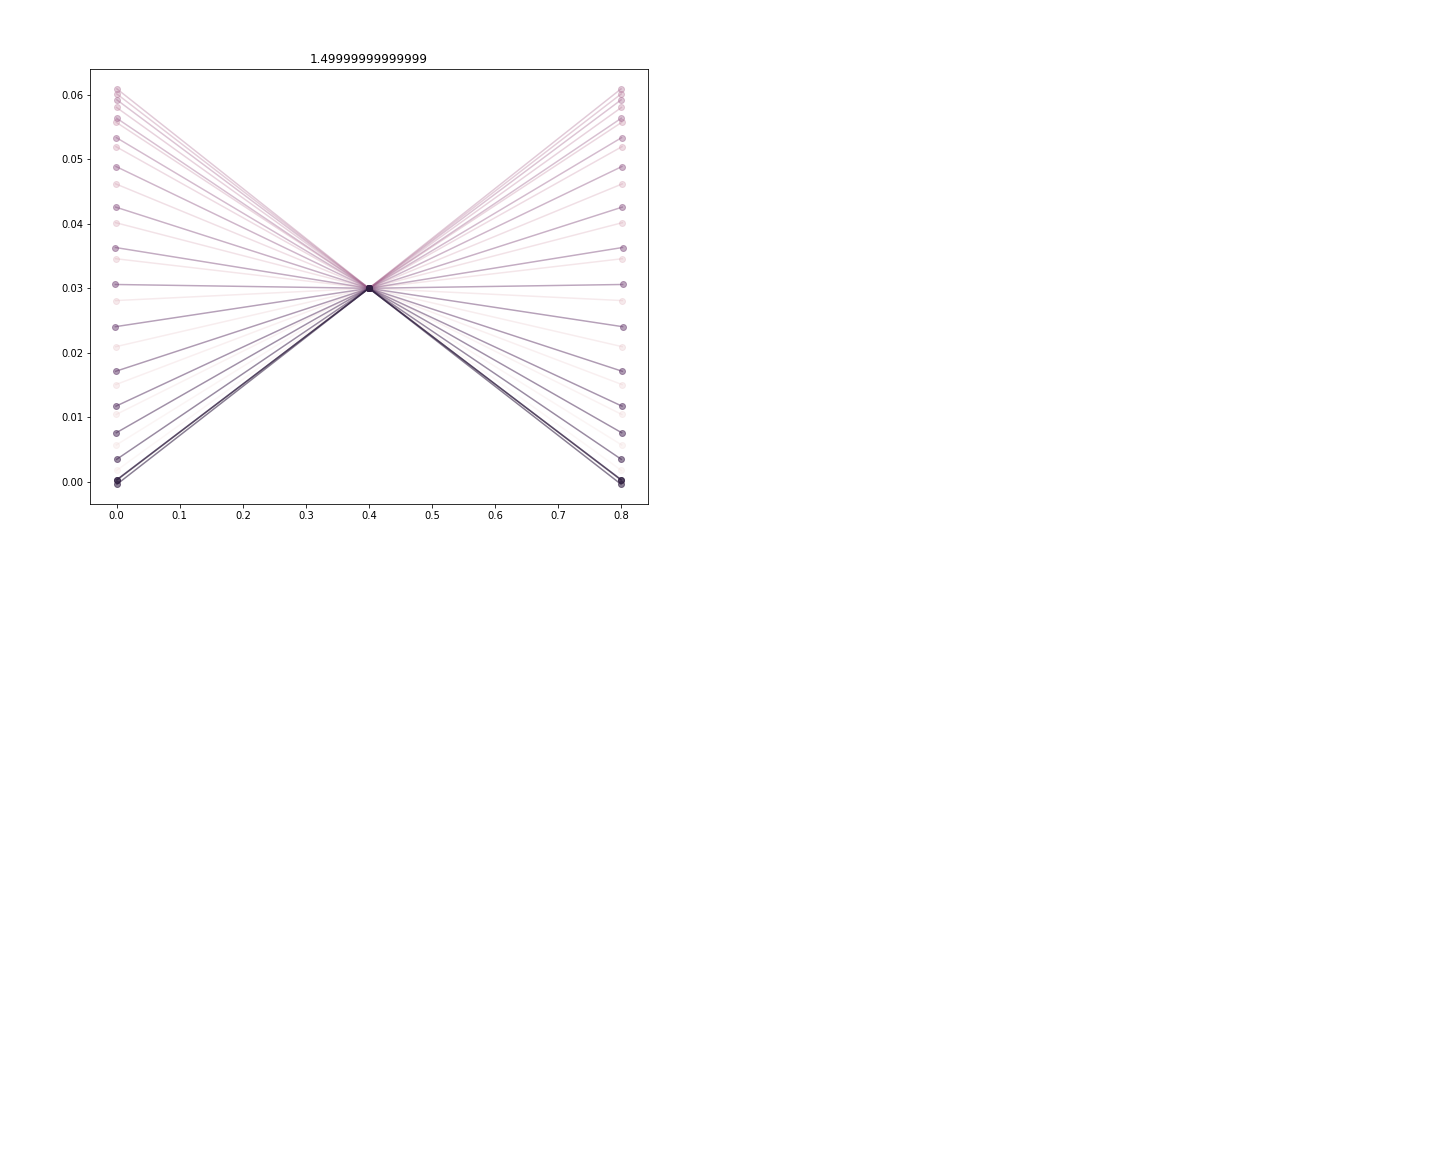

In [7]:
from matplotlib import cm
import seaborn as sns
%matplotlib inline
plot = True
dump_povray = False

my_dt = 5.0e-3
t = 0.0
t_end = 1.5
tstep  = 0
tot_it = t_end / my_dt

prefix = "./data/bending/"
color = sns.cubehelix_palette(tot_it)

if plot:
    %matplotlib notebook
    plt.ion()
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.plot(theRod.r[:,0], theRod.r[:,1], 'o-', alpha=tstep/tot_it)

while t < t_end:
    
    rodRun.step(my_dt)
    t = t + my_dt
    tstep += 1
    
    if tstep % 10 == 0:
        if dump_povray:
            dump_snake.dump_snake_to_povray(tstep, theRod.r, np.average(theRod.radii), prefix)
        if plot:
            ax.plot(theRod.r[:,0], theRod.r[:,1], 'o-', alpha=0.1+0.5*tstep/tot_it, c=color[tstep-1])
            ax.set_title(t)
            fig.canvas.draw()
            fig.canvas.flush_events()

%matplotlib inline

<IPython.core.display.Javascript object>


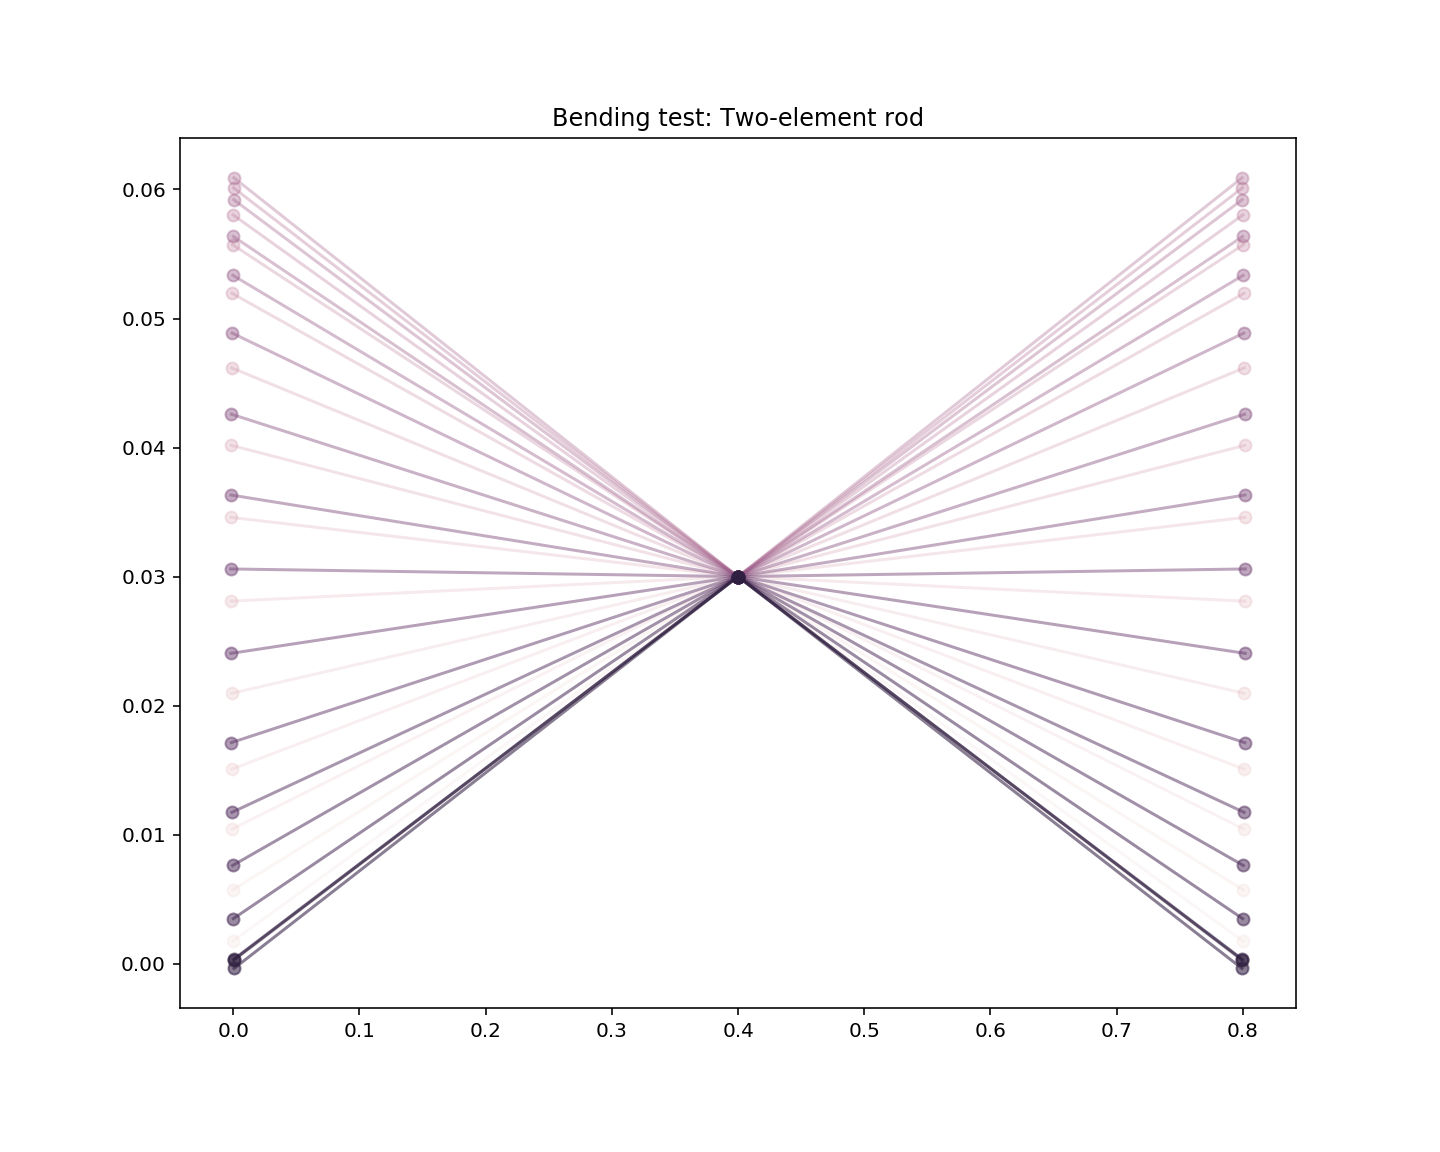

In [6]:
ax.set_title('Bending test: Two-element rod')
fig

In [10]:
fig.savefig('Bending.png', dpi=1200)